In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

615

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f33d6ed14ca3c25555ee096468288f72


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | saskylakh
Processing Record 5 of Set 1 | kokopo
Processing Record 6 of Set 1 | katsuura
Processing Record 7 of Set 1 | kijang
Processing Record 8 of Set 1 | acarau
Processing Record 9 of Set 1 | omboue
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | provideniya
Processing Record 12 of Set 1 | penzance
Processing Record 13 of Set 1 | lolua
City not found. Skipping...
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | chuy
Processing Record 17 of Set 1 | cidreira
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | shache
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | ostrovnoy
Processing Record 22 of Set 1 | airai
Processing R

Processing Record 34 of Set 4 | tuatapere
Processing Record 35 of Set 4 | litoral del san juan
City not found. Skipping...
Processing Record 36 of Set 4 | olbia
Processing Record 37 of Set 4 | saint-augustin
Processing Record 38 of Set 4 | opuwo
Processing Record 39 of Set 4 | yaan
Processing Record 40 of Set 4 | pisco
Processing Record 41 of Set 4 | olafsvik
Processing Record 42 of Set 4 | shahpur
Processing Record 43 of Set 4 | tolaga bay
Processing Record 44 of Set 4 | guerrero negro
Processing Record 45 of Set 4 | sao felix do xingu
Processing Record 46 of Set 4 | isangel
Processing Record 47 of Set 4 | lusambo
Processing Record 48 of Set 4 | ust-maya
Processing Record 49 of Set 4 | strezhevoy
Processing Record 50 of Set 4 | saravan
Processing Record 1 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 5 | sola
Processing Record 3 of Set 5 | longyan
Processing Record 4 of Set 5 | ixtapa
Processing Record 5 of Set 5 | kavieng
Processing Record 6 of Set 5 |

Processing Record 23 of Set 8 | lumeje
Processing Record 24 of Set 8 | lavrentiya
Processing Record 25 of Set 8 | nemuro
Processing Record 26 of Set 8 | viedma
Processing Record 27 of Set 8 | zhelyabovka
Processing Record 28 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 29 of Set 8 | rabo de peixe
Processing Record 30 of Set 8 | teya
Processing Record 31 of Set 8 | turayf
Processing Record 32 of Set 8 | alma
Processing Record 33 of Set 8 | lerwick
Processing Record 34 of Set 8 | tongling
Processing Record 35 of Set 8 | hobe sound
Processing Record 36 of Set 8 | zhigansk
Processing Record 37 of Set 8 | flinders
Processing Record 38 of Set 8 | acapulco
Processing Record 39 of Set 8 | iqaluit
Processing Record 40 of Set 8 | phan rang
City not found. Skipping...
Processing Record 41 of Set 8 | jizan
Processing Record 42 of Set 8 | verkhoyansk
Processing Record 43 of Set 8 | sitka
Processing Record 44 of Set 8 | seoul
Processing Record 45 of Set 8 | honiara

Processing Record 12 of Set 12 | envira
Processing Record 13 of Set 12 | grindavik
Processing Record 14 of Set 12 | avera
Processing Record 15 of Set 12 | gloucester
Processing Record 16 of Set 12 | esna
Processing Record 17 of Set 12 | bibiani
Processing Record 18 of Set 12 | pokrovsk
Processing Record 19 of Set 12 | santa maria
Processing Record 20 of Set 12 | biharkeresztes
Processing Record 21 of Set 12 | zhoucheng
Processing Record 22 of Set 12 | pekalongan
Processing Record 23 of Set 12 | bend
Processing Record 24 of Set 12 | sisimiut
Processing Record 25 of Set 12 | luanda
Processing Record 26 of Set 12 | quatre cocos
Processing Record 27 of Set 12 | nanga eboko
Processing Record 28 of Set 12 | mackenzie
Processing Record 29 of Set 12 | achisay
City not found. Skipping...
Processing Record 30 of Set 12 | maracaibo
Processing Record 31 of Set 12 | camacha
Processing Record 32 of Set 12 | visby
Processing Record 33 of Set 12 | esmeralda
Processing Record 34 of Set 12 | puerto baqu

In [10]:
len(city_data)

564

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,74.75,78,100,19.17,CK,2022-11-23 03:35:31
1,Albany,42.6001,-73.9662,37.54,71,17,4.29,US,2022-11-23 03:35:56
2,Busselton,-33.6500,115.3333,76.51,48,27,10.02,AU,2022-11-23 03:39:58
3,Saskylakh,71.9167,114.0833,-38.70,100,56,1.68,RU,2022-11-23 03:39:59
4,Kokopo,-4.3520,152.2633,86.72,58,86,7.05,PG,2022-11-23 03:39:59
...,...,...,...,...,...,...,...,...,...
559,Kaniama,-7.5667,24.1833,60.75,97,85,1.30,CD,2022-11-23 03:43:57
560,Lesozavodsk,45.4794,133.4244,30.47,53,100,2.64,RU,2022-11-23 03:43:58
561,Panzhihua,26.5851,101.7128,68.00,50,21,1.07,CN,2022-11-23 03:43:58
562,Yuanping,38.7153,112.7575,47.73,54,26,3.27,CN,2022-11-23 03:43:59


In [12]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [13]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(20)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2022-11-23 03:35:31,-21.2078,-159.7750,74.75,78,100,19.17
1,Albany,US,2022-11-23 03:35:56,42.6001,-73.9662,37.54,71,17,4.29
2,Busselton,AU,2022-11-23 03:39:58,-33.6500,115.3333,76.51,48,27,10.02
3,Saskylakh,RU,2022-11-23 03:39:59,71.9167,114.0833,-38.70,100,56,1.68
4,Kokopo,PG,2022-11-23 03:39:59,-4.3520,152.2633,86.72,58,86,7.05
5,Katsuura,JP,2022-11-23 03:40:00,35.1333,140.3000,57.22,89,100,20.49
6,Kijang,KR,2022-11-23 03:40:00,35.2442,129.2139,62.33,60,84,6.60
7,Acarau,BR,2022-11-23 03:40:00,-2.8856,-40.1200,78.67,78,24,16.69
8,Omboue,GA,2022-11-23 03:40:01,-1.5746,9.2618,76.15,91,100,2.89
9,Mataura,NZ,2022-11-23 03:40:02,-46.1927,168.8643,60.48,31,79,7.56


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

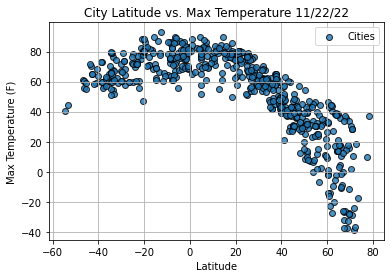

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend()

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

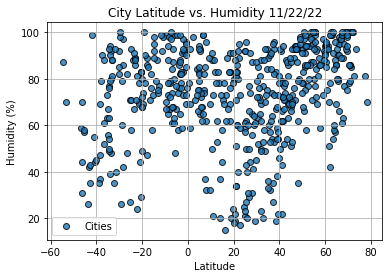

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend()

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

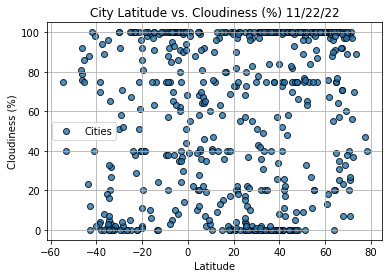

In [18]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend()

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

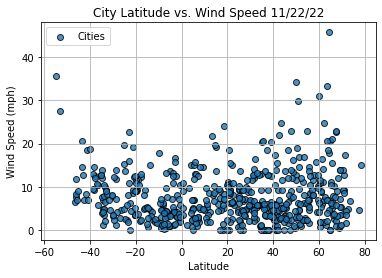

In [19]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend()

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"R value = {r_value}")

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2022-11-23 03:35:31,-21.2078,-159.7750,74.75,78,100,19.17
2,Busselton,AU,2022-11-23 03:39:58,-33.6500,115.3333,76.51,48,27,10.02
4,Kokopo,PG,2022-11-23 03:39:59,-4.3520,152.2633,86.72,58,86,7.05
7,Acarau,BR,2022-11-23 03:40:00,-2.8856,-40.1200,78.67,78,24,16.69
8,Omboue,GA,2022-11-23 03:40:01,-1.5746,9.2618,76.15,91,100,2.89
...,...,...,...,...,...,...,...,...,...
546,Takapau,NZ,2022-11-23 03:43:52,-40.0333,176.3500,63.73,45,2,18.75
548,Sao Jose Da Coroa Grande,BR,2022-11-23 03:43:53,-8.8978,-35.1478,75.74,78,38,7.07
550,Paragominas,BR,2022-11-23 03:42:51,-2.9667,-47.4833,77.23,82,75,1.48
559,Kaniama,CD,2022-11-23 03:43:57,-7.5667,24.1833,60.75,97,85,1.30


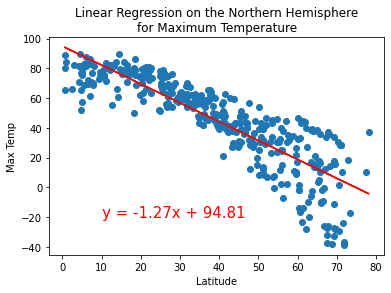

R value = -0.8600789492871834


In [22]:
# Linear regression on the Northern Hemisphere vs Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature',
                       'Max Temp',(10,-20))

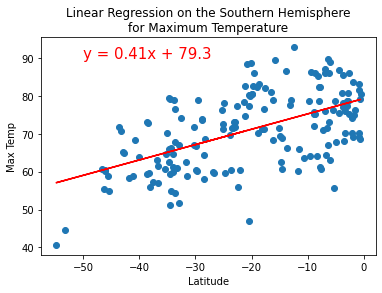

R value = 0.5573646246131522


In [23]:
# Linear regression on the Southern Hemisphere vs Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature',
                       'Max Temp',(-50,90))

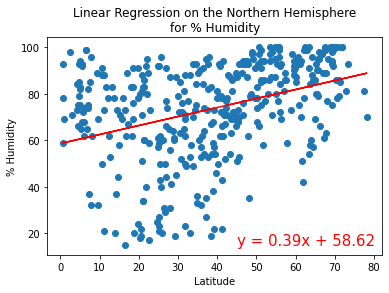

R value = 0.36426508094283033


In [24]:
# Linear regression on the Northern Hemisphere vs Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Northern Hemisphere\nfor % Humidity',
                       '% Humidity',(45,15))

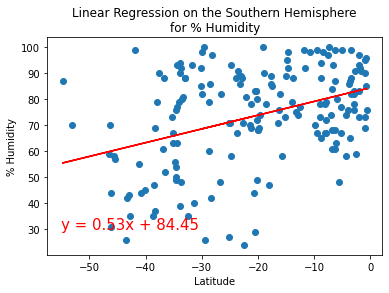

R value = 0.3910957417247767


In [25]:
# Linear regression on the Southern Hemisphere vs Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Southern Hemisphere\nfor % Humidity',
                       '% Humidity',(-55,30))

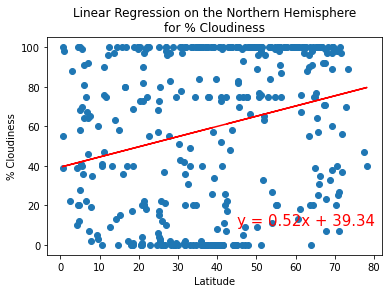

R value = 0.25776659745196506


In [26]:
# Linear regression on the Northern Hemisphere vs Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Northern Hemisphere\nfor % Cloudiness',
                       '% Cloudiness',(45,10))

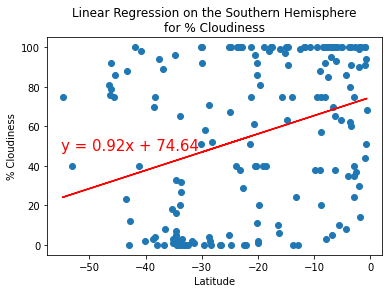

R value = 0.325534084501403


In [27]:
# Linear regression on the Southern Hemisphere vs Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Southern Hemisphere\nfor % Cloudiness',
                       '% Cloudiness',(-55,48))

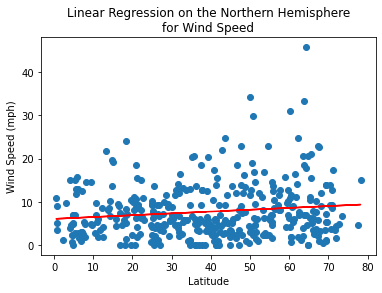

R value = 0.13374021633719693


In [28]:
# Linear regression on the Northern Hemisphere vs Wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Northern Hemisphere\nfor Wind Speed',
                       'Wind Speed (mph)',(0,50))

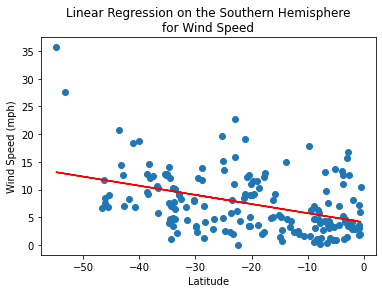

R value = -0.41637492001789245


In [29]:
# Linear regression on the Southern Hemisphere vs Wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Southern Hemisphere\nfor Wind Speed',
                       'Wind Speed (mph)',(-55,40))